In [1]:
#REQUIRED TOOLS
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tqdm import tqdm
from skimage.io import imread, imshow
import cv2 as cv2
from PIL import Image
import glob,os


C:\Users\SAWON\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\SAWON\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\SAWON\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\SAWON\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
datadir="data/"
train_images="data/training/"
train_masks="data/training/groundtruth/"
test_images="data/test_set/"
#dataset=[]
#label=[]
SIZE=128
CHANNELS=3
X_train = np.zeros((101, SIZE, SIZE, CHANNELS), dtype = np.uint8) 
Y_train = np.zeros((101, SIZE, SIZE,1), dtype = np.bool)
X_test= np.zeros((52, SIZE, SIZE, CHANNELS), dtype = np.uint8) 

#print(len(train_images))

train_images=os.listdir(datadir+'training/images/')
print(train_images)
for i,image_name in enumerate(train_images):
    if(image_name.split('.')[1]=='png'):
        image=cv2.imread(datadir+'training/images/'+image_name)
        image=Image.fromarray(image,'RGB')
        #image = cv2.cvtColor(image, cv.COLOR_BGR2GRAY)
        image=image.resize((SIZE,SIZE))
        print(image.shape)
        X_train[i]=np.array(image)
        
print(i)        




['satImage_001.png', 'satImage_002.png', 'satImage_003.png', 'satImage_004.png', 'satImage_005.png', 'satImage_006.png', 'satImage_007.png', 'satImage_008.png', 'satImage_009.png', 'satImage_010.png', 'satImage_011.png', 'satImage_012.png', 'satImage_013.png', 'satImage_014.png', 'satImage_015.png', 'satImage_016.png', 'satImage_017.png', 'satImage_018.png', 'satImage_019.png', 'satImage_020.png', 'satImage_021.png', 'satImage_022.png', 'satImage_023.png', 'satImage_024.png', 'satImage_025.png', 'satImage_026.png', 'satImage_027.png', 'satImage_028.png', 'satImage_029.png', 'satImage_030.png', 'satImage_031.png', 'satImage_032.png', 'satImage_033.png', 'satImage_034.png', 'satImage_035.png', 'satImage_036.png', 'satImage_037.png', 'satImage_038.png', 'satImage_039.png', 'satImage_040.png', 'satImage_041.png', 'satImage_042.png', 'satImage_043.png', 'satImage_044.png', 'satImage_045.png', 'satImage_046.png', 'satImage_047.png', 'satImage_048.png', 'satImage_049.png', 'satImage_050.png',

AttributeError: 'Image' object has no attribute 'shape'

In [41]:
train_masks=os.listdir(datadir+'training/groundtruth/')
for i,image_name in enumerate(train_masks):
    if(image_name.split('.')[1]=='png'):
        image=cv2.imread(datadir+'training/groundtruth/'+image_name)
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image=Image.fromarray(image)
        image=image.resize((SIZE,SIZE))
        image=image.convert('L')
        image = np.expand_dims(image, axis=-1)
        #print(image.shape)
        Y_train[i]=image
print(i)



99


In [94]:
test_images=os.listdir(datadir+'test_set/')
for i,image_name in enumerate(test_images):
    if(image_name.split('.')[1]=='png'):
        image=cv2.imread(datadir+'test_set/'+image_name)
        image=Image.fromarray(image,'RGB')
        #image = cv2.cvtColor(image, cv.COLOR_BGR2GRAY)
        image=image.resize((SIZE,SIZE))
        X_test[i]=image
print(i)


49


In [95]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

(101, 128, 128, 3)
(101, 128, 128, 1)
(52, 128, 128, 3)


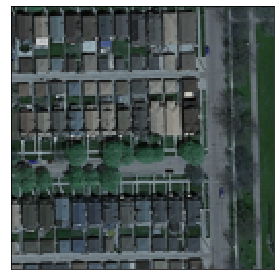

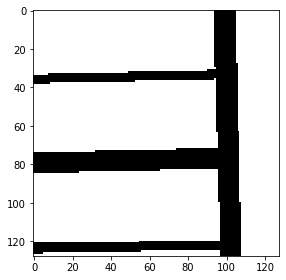

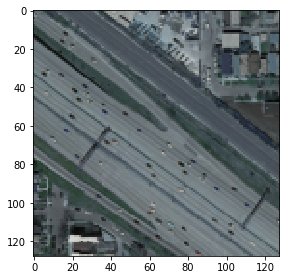

In [96]:
#plt.subplot()
plt.xticks([])
plt.yticks([])
#plt.grid(False)
imshow(np.squeeze(X_train[i]))
plt.show()
imshow(np.squeeze(Y_train[i]),cmap=plt.cm.binary)
plt.show()
imshow(np.squeeze(X_test[i]))
plt.show()


In [69]:
#Build the model(EXPANSION PATH)

# Step 1: Defining the input layer 
inputs = tf.keras.layers.Input((SIZE, SIZE, CHANNELS))
# Step 2: Convert the integer values of the input to floating points 
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)
#LAYER 1
# Step 3: Forming the first conv layer 
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(s)
# Step 4: Add dropout 
c1 = tf.keras.layers.Dropout(rate = 0.1)(c1)
# Step 5: Forming the second conv layer
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c1)
# Step 6: Forming the max pool layer 
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

#LAYER 2
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(p1)
c2 = tf.keras.layers.Dropout(rate = 0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

#LAYER 3
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(p2)
c3 = tf.keras.layers.Dropout(rate = 0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

#LAYER 4
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(p3)
c4 = tf.keras.layers.Dropout(rate = 0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c4)
p4 = tf.keras.layers.MaxPooling2D((2, 2))(c4)

#LAYER 5
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(p4)
c5 = tf.keras.layers.Dropout(rate = 0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c5)

In [70]:
#Build the Model(CONTRACTION PATH)

u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides = (2, 2), padding = 'same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(u6)
c6 = tf.keras.layers.Dropout(rate = 0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c6)

u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides = (2, 2), padding = 'same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(u7)
c7 = tf.keras.layers.Dropout(rate = 0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c7)

u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides = (2, 2), padding = 'same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(u8)
c8 = tf.keras.layers.Dropout(rate = 0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c8)

u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides = (2, 2), padding = 'same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis = 3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(u9)
c9 = tf.keras.layers.Dropout(rate = 0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c9)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [71]:
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation = 'sigmoid')(c9)

model1 = tf.keras.Model(inputs = [inputs], outputs = [outputs])
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model1.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 128, 128, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 448         lambda[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 128, 128, 16) 0           conv2d[0][0]                     


In [73]:
# Adding a model checkpoint 

checkpointer = tf.keras.callbacks.ModelCheckpoint('model_new.h5', verbose = 1, save_best_only = True)

callback = [tf.keras.callbacks.EarlyStopping(patience = 2, monitor = 'val_loss')]

results = model1.fit(X_train, Y_train, validation_split = 0.1, batch_size = 16, epochs = 25, callbacks = callback)

Train on 90 samples, validate on 11 samples
Epoch 1/25
90/90 [==============================] - 19s 214ms/sample - loss: 0.5678 - acc: 0.7663 - val_loss: 0.6023 - val_acc: 0.7617
Epoch 2/25
90/90 [==============================] - 18s 198ms/sample - loss: 0.5529 - acc: 0.7672 - val_loss: 0.5968 - val_acc: 0.7617
Epoch 3/25
90/90 [==============================] - 18s 199ms/sample - loss: 0.5430 - acc: 0.7672 - val_loss: 0.5866 - val_acc: 0.7617
Epoch 4/25
90/90 [==============================] - 18s 197ms/sample - loss: 0.5338 - acc: 0.7672 - val_loss: 0.5832 - val_acc: 0.7617
Epoch 5/25
90/90 [==============================] - 20s 217ms/sample - loss: 0.5217 - acc: 0.7672 - val_loss: 0.5640 - val_acc: 0.7617
Epoch 6/25
90/90 [==============================] - 23s 256ms/sample - loss: 0.5107 - acc: 0.7672 - val_loss: 0.5605 - val_acc: 0.7617
Epoch 7/25
90/90 [==============================] - 20s 225ms/sample - loss: 0.5015 - acc: 0.7672 - val_loss: 0.5505 - val_acc: 0.7617
Epoch 8/25


In [97]:
predict_train = model1.predict(X_train[:int(X_train.shape[0] * 0.9)], verbose = 1)
predict_val = model1.predict(X_train[int(X_train.shape[0] * 0.9):], verbose = 1)
pred_test = model1.predict(X_test, verbose = 1)

52/52 [==============================] - 2s 44ms/sample


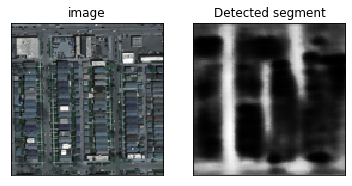

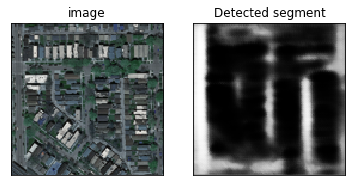

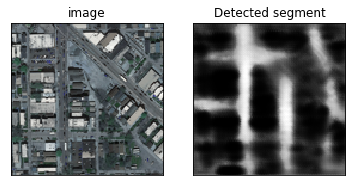

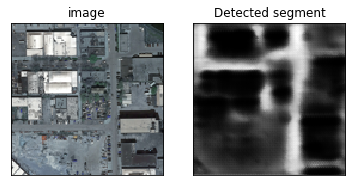

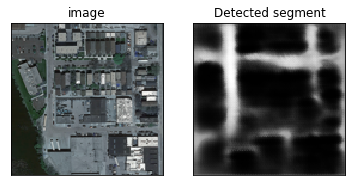

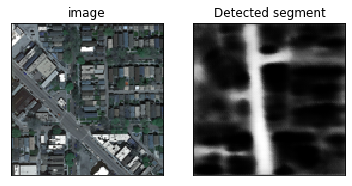

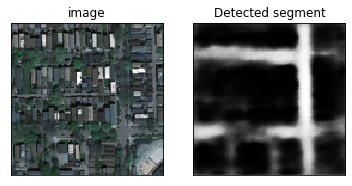

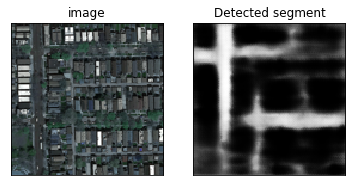

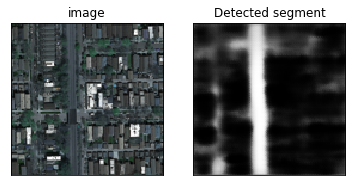

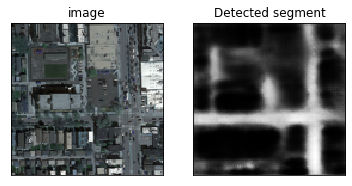

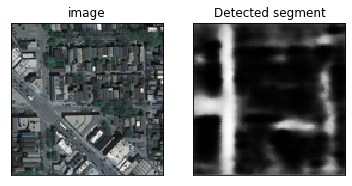

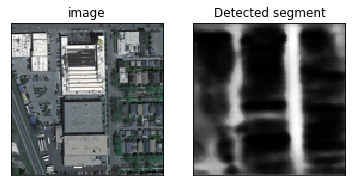

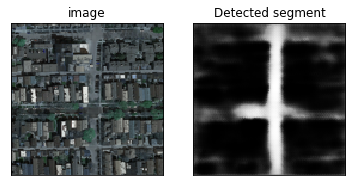

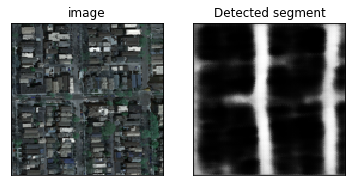

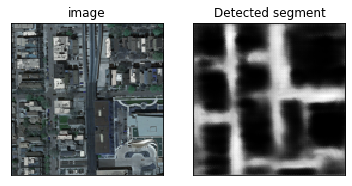

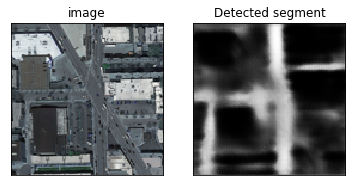

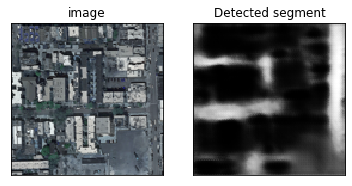

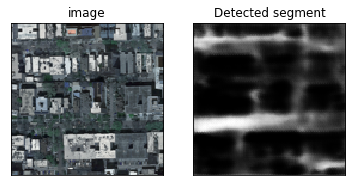

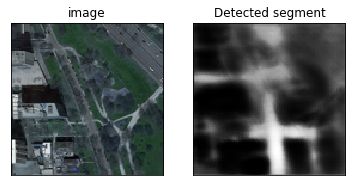

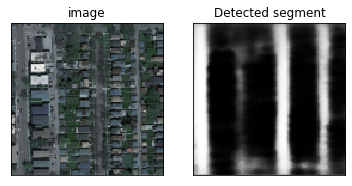

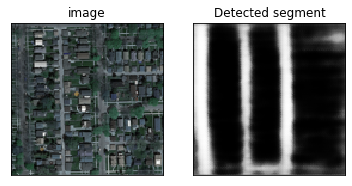

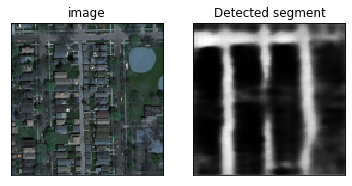

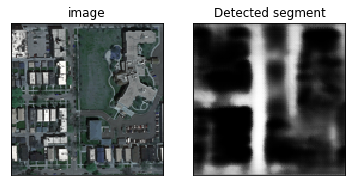

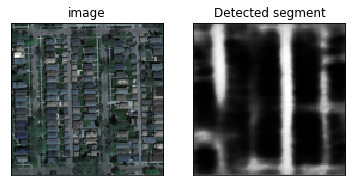

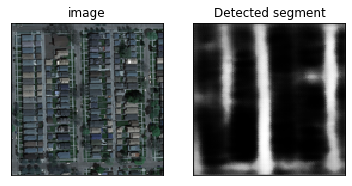

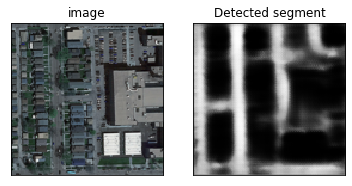

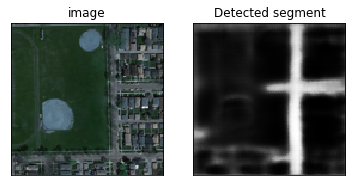

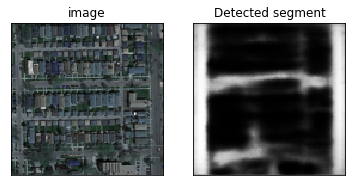

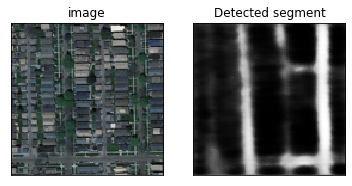

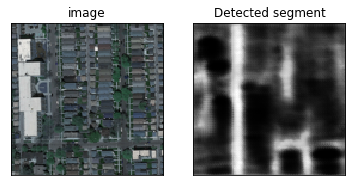

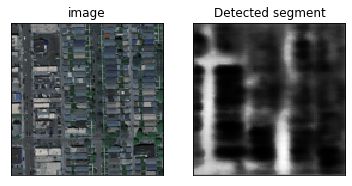

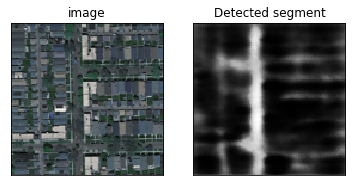

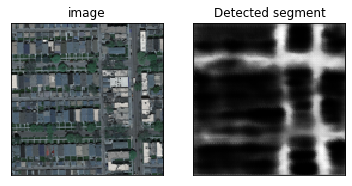

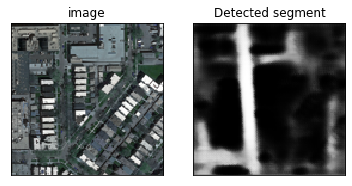

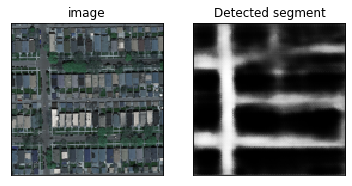

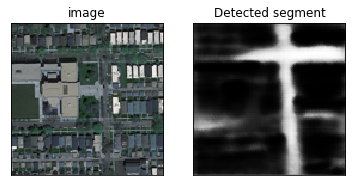

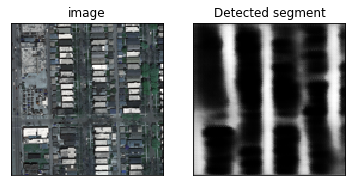

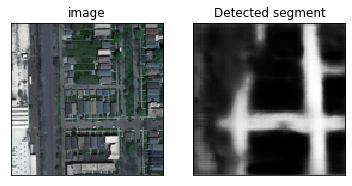

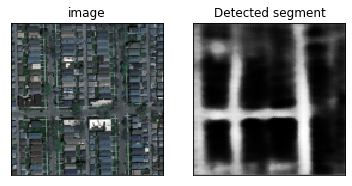

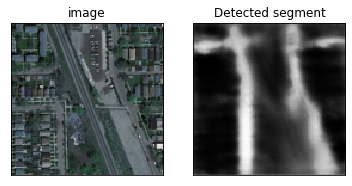

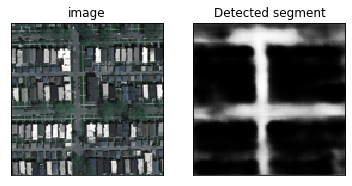

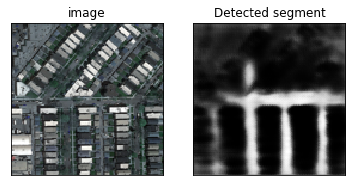

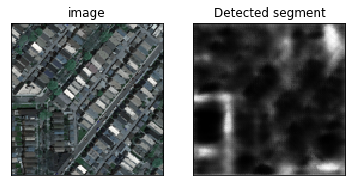

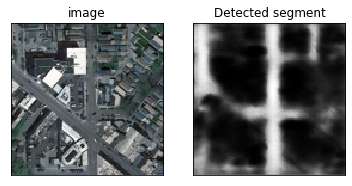

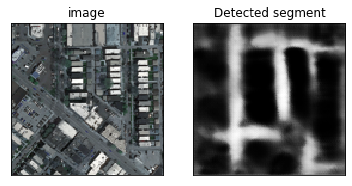

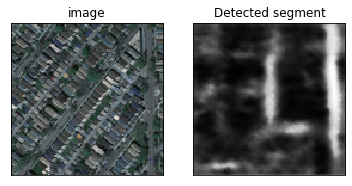

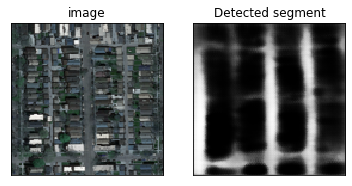

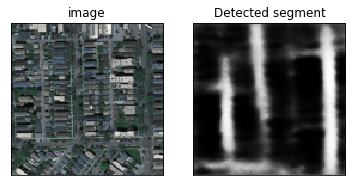

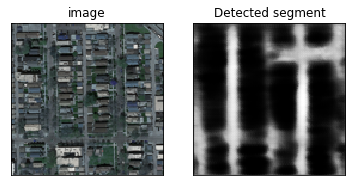

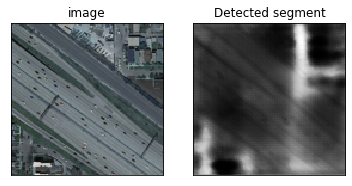

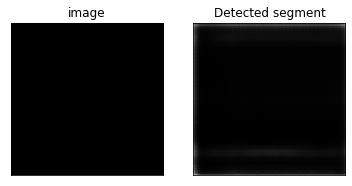

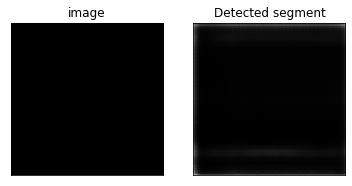

In [98]:
plt.gray()
for i, p in enumerate(pred_test-5):
    plt.grid(),plt.subplot(122),plt.imshow(p.reshape(p.shape[0],p.shape[1]))
    plt.title('Detected segment'), plt.xticks([]), plt.yticks([])
    plt.grid(),plt.subplot(121),plt.imshow(X_test[i])
#     plt.grid(),plt.subplot(121),plt.imshow(pred_test_t[i])
    plt.title('image'), plt.xticks([]), plt.yticks([])
    plt.show()
# print(time.localtime())